In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('dataExploration').getOrCreate()

In [2]:
data = spark.read.csv("Datasets/Average Weekly Paid Hours (Employees) by Industry (ANZSIC06) and Sex (Qrtly-MarJunSepDec).csv",inferSchema=True,header=True)

In [3]:
data.show()

+-----------+-------------------+------+---------------------------------------+----------------------------------+----------------------------------------------------------+
|YearQuarter|           Industry|Gender|Average Weekly Ordinary Time Hours Paid|Average Weekly Overtime Hours Paid|Average Total (Ordinary Time + Overtime) Weekly Hours Paid|
+-----------+-------------------+------+---------------------------------------+----------------------------------+----------------------------------------------------------+
|     1989Q1|Forestry and Mining|  Male|                                  37.74|                              3.15|                                                      40.9|
|     1989Q2|Forestry and Mining|  Male|                                   36.9|                              2.87|                                                     39.77|
|     1989Q3|Forestry and Mining|  Male|                                  37.22|                              2.81|          

In [4]:
results = data.filter("Industry = 'All Industries'").select('YearQuarter','Gender','Average Total (Ordinary Time + Overtime) Weekly Hours Paid')
resultsM = results.filter("Gender = 'Male'").select('YearQuarter','Average Total (Ordinary Time + Overtime) Weekly Hours Paid')
resultsM.show()
resultsF = results.filter("Gender = 'Female'").select('YearQuarter','Average Total (Ordinary Time + Overtime) Weekly Hours Paid')
resultsF.show()

+-----------+----------------------------------------------------------+
|YearQuarter|Average Total (Ordinary Time + Overtime) Weekly Hours Paid|
+-----------+----------------------------------------------------------+
|     1989Q1|                                                     38.22|
|     1989Q2|                                                     37.77|
|     1989Q3|                                                     37.51|
|     1989Q4|                                                     38.07|
|     1990Q1|                                                     37.93|
|     1990Q2|                                                     37.73|
|     1990Q3|                                                     37.23|
|     1990Q4|                                                     37.41|
|     1991Q1|                                                     37.48|
|     1991Q2|                                                     37.01|
|     1991Q3|                                      

In [5]:
resultsX = data.filter("Industry = 'Public Administration and Safety'").select('YearQuarter','Gender','Average Total (Ordinary Time + Overtime) Weekly Hours Paid')
resultsXM = resultsX.filter("Gender = 'Male'").select('YearQuarter','Average Total (Ordinary Time + Overtime) Weekly Hours Paid')
resultsXM.show()
resultsXF = resultsX.filter("Gender = 'Female'").select('YearQuarter','Average Total (Ordinary Time + Overtime) Weekly Hours Paid')
resultsXF.show()

+-----------+----------------------------------------------------------+
|YearQuarter|Average Total (Ordinary Time + Overtime) Weekly Hours Paid|
+-----------+----------------------------------------------------------+
|     1989Q1|                                                      37.9|
|     1989Q2|                                                     37.98|
|     1989Q3|                                                     37.58|
|     1989Q4|                                                     37.86|
|     1990Q1|                                                     37.65|
|     1990Q2|                                                     37.61|
|     1990Q3|                                                     37.18|
|     1990Q4|                                                     37.36|
|     1991Q1|                                                     37.34|
|     1991Q2|                                                     37.34|
|     1991Q3|                                      

In [6]:
resultsY = data.filter("Industry = 'Education and Training'").select('YearQuarter','Gender','Average Total (Ordinary Time + Overtime) Weekly Hours Paid')
resultsYM = resultsY.filter("Gender = 'Male'").select('YearQuarter','Average Total (Ordinary Time + Overtime) Weekly Hours Paid')
resultsYM.show()
resultsYF = resultsY.filter("Gender = 'Female'").select('YearQuarter','Average Total (Ordinary Time + Overtime) Weekly Hours Paid')
resultsYF.show()

+-----------+----------------------------------------------------------+
|YearQuarter|Average Total (Ordinary Time + Overtime) Weekly Hours Paid|
+-----------+----------------------------------------------------------+
|     1989Q1|                                                      35.8|
|     1989Q2|                                                     34.86|
|     1989Q3|                                                     34.31|
|     1989Q4|                                                     34.21|
|     1990Q1|                                                      34.9|
|     1990Q2|                                                     33.42|
|     1990Q3|                                                     33.12|
|     1990Q4|                                                     33.23|
|     1991Q1|                                                     34.03|
|     1991Q2|                                                     33.03|
|     1991Q3|                                      

In [7]:
results1 = resultsM.toPandas()
results2 = resultsF.toPandas()

In [8]:
results3 = resultsXM.toPandas()
results4 = resultsXF.toPandas()

In [9]:
results5 = resultsYM.toPandas()
results6 = resultsYF.toPandas()

In [10]:
import matplotlib.pyplot as plt

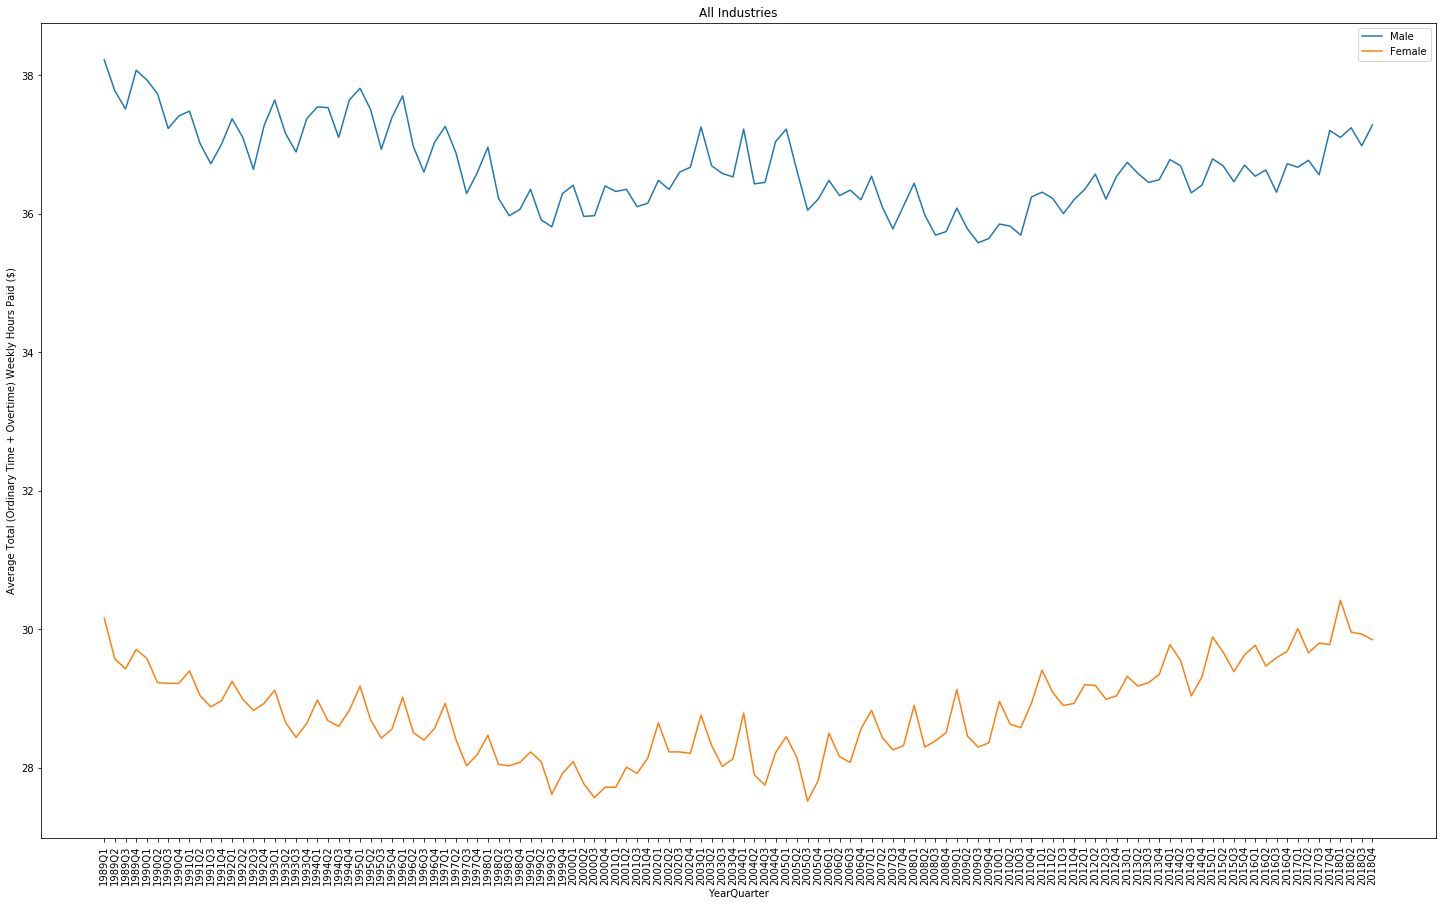

In [16]:
names = results1['YearQuarter']
values1 = results1['Average Total (Ordinary Time + Overtime) Weekly Hours Paid']
values2 = results2['Average Total (Ordinary Time + Overtime) Weekly Hours Paid']

fig, ax = plt.subplots()
ax.plot(names, values1, label="Male")
ax.plot(names, values2, label="Female")
ax.legend()

ax.set_xlabel('YearQuarter')
ax.set_ylabel('Average Total (Ordinary Time + Overtime) Weekly Hours Paid ($)')
ax.set_title('All Industries')

plt.xticks(rotation=90)

plt.rcParams["figure.figsize"] = (25,15)

plt.show()

In [12]:
import matplotlib.pyplot as plt2

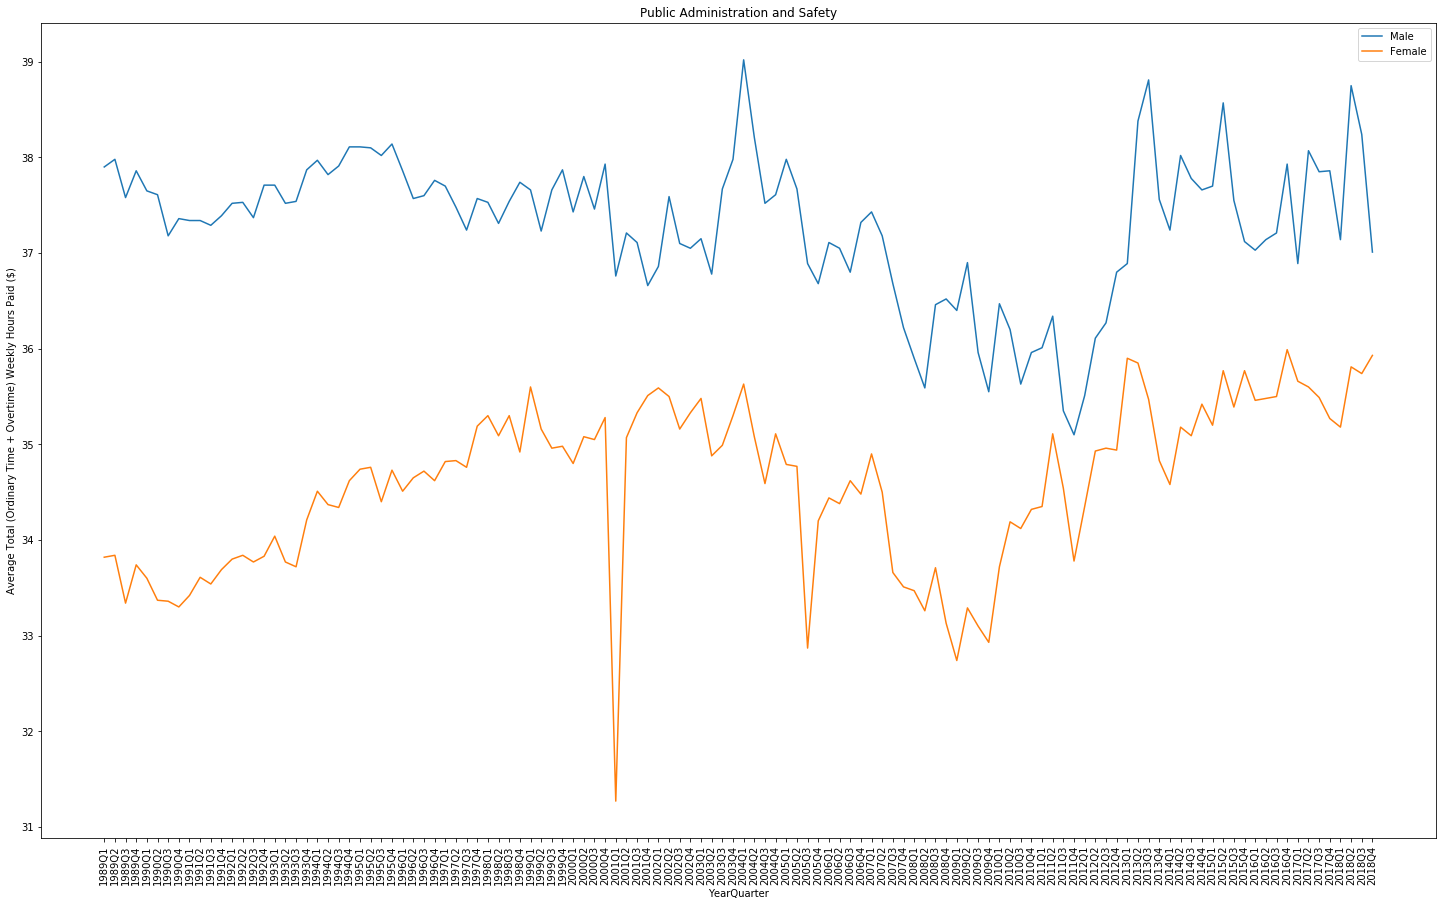

In [13]:
names2 = results3['YearQuarter']
values3 = results3['Average Total (Ordinary Time + Overtime) Weekly Hours Paid']
values4 = results4['Average Total (Ordinary Time + Overtime) Weekly Hours Paid']

fig1, ax1 = plt2.subplots()
ax1.plot(names2, values3, label="Male")
ax1.plot(names2, values4, label="Female")
ax1.legend()

ax1.set_xlabel('YearQuarter')
ax1.set_ylabel('Average Total (Ordinary Time + Overtime) Weekly Hours Paid ($)')
ax1.set_title('Public Administration and Safety')

plt2.xticks(rotation=90)

plt2.rcParams["figure.figsize"] = (25,15)

plt2.show()

In [14]:
import matplotlib.pyplot as plt3

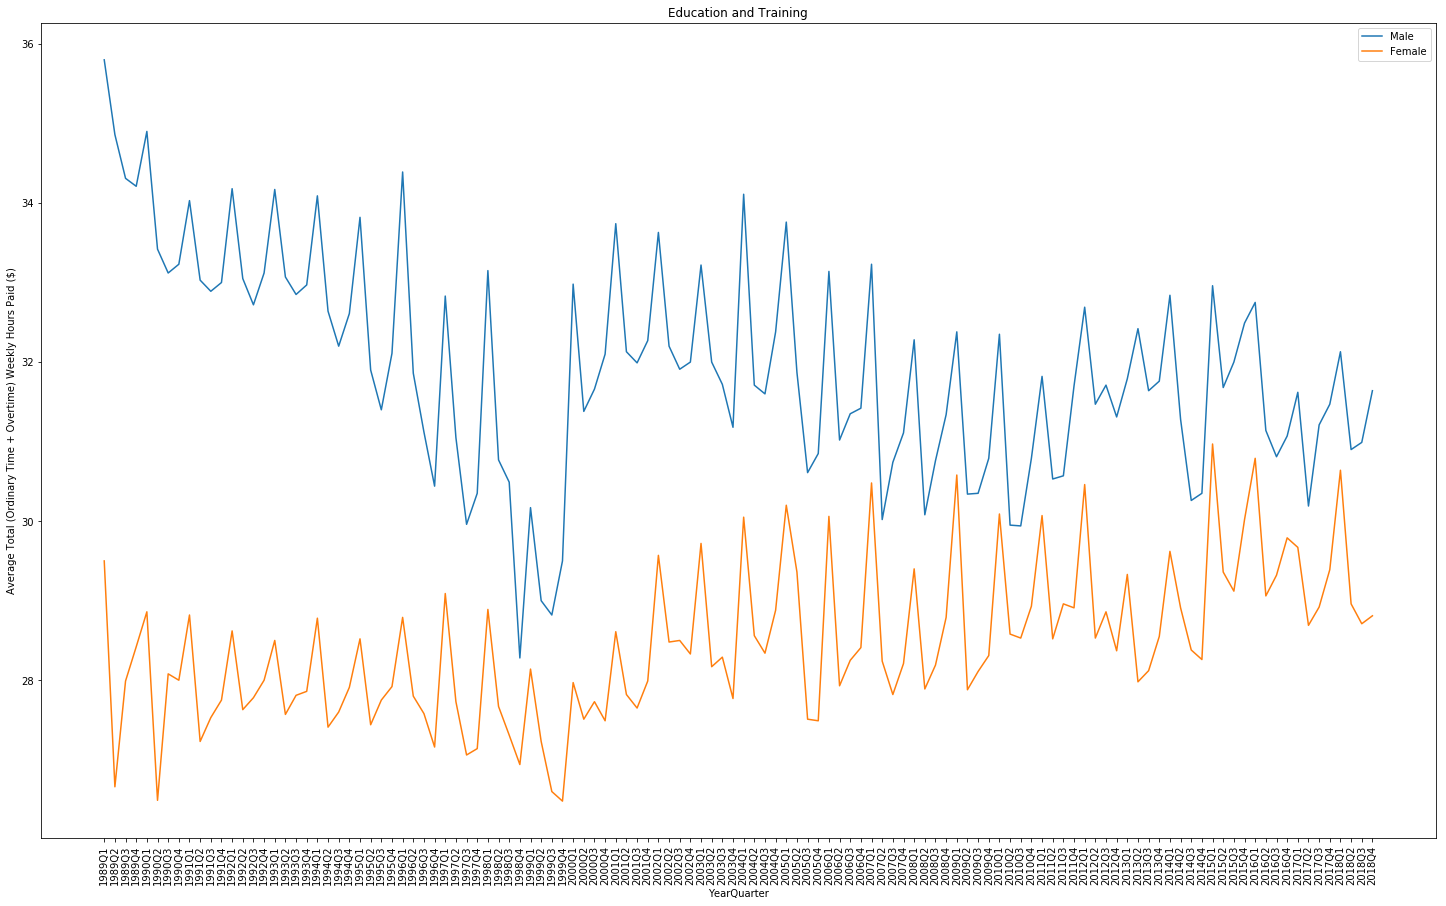

In [15]:
names3 = results5['YearQuarter']
values5 = results5['Average Total (Ordinary Time + Overtime) Weekly Hours Paid']
values6 = results6['Average Total (Ordinary Time + Overtime) Weekly Hours Paid']

fig2, ax2 = plt.subplots()
ax2.plot(names3, values5, label="Male")
ax2.plot(names3, values6, label="Female")
ax2.legend()

ax2.set_xlabel('YearQuarter')
ax2.set_ylabel('Average Total (Ordinary Time + Overtime) Weekly Hours Paid ($)')
ax2.set_title('Education and Training')

plt3.xticks(rotation=90)

plt3.rcParams["figure.figsize"] = (25,15)

plt3.show()